<a href="https://colab.research.google.com/github/MishkaKnizhka98/PyTorch-YouTube-Tutorial/blob/main/Simple_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [2]:
#Create a Model Class that inherits nn.Module
class Model(nn.Module):
  #Input layer (4 features of a flower) --> Hidden layer1 (number of neurons) --> HL2 (n) --> output (3 classes of iris flowers)
  def __init__(self, in_features = 4, h1 = 8, h2 = 9, out_features = 3):
    super().__init__() #Instantiate nn.Module
    self.fc1 = nn.Linear(in_features, h1) #fully-connected1, Linear model
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x



In [3]:
# Pick a manual seed for randomization
torch.manual_seed(32)
# Create an instance of model
model = Model()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [6]:
my_df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [7]:
#Change last column from strings to integers
my_df["species"] = my_df["species"].replace("setosa", 0.0)
my_df["species"] = my_df["species"].replace("versicolor", 1.0)
my_df["species"] = my_df["species"].replace("virginica", 2.0)
my_df

/tmp/ipython-input-2290624785.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df["species"] = my_df["species"].replace("virginica", 2.0)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [8]:
# Train Test split Set X, y
X = my_df.drop("species", axis = 1) # axis = 1 -> column
y = my_df["species"]

In [9]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
# Convert X to numpy arrays
X = X.values
y = y.values

In [11]:
from sklearn.model_selection import train_test_split


In [12]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32)

In [13]:
# Convert features to float tensors (32 bits)
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
X_train.dtype

torch.float32

In [14]:
# Convert y labels to tensors long (64 bits)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)
y_train.dtype

torch.int64

In [15]:
# Set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizers, lr = learning rate (if error doesn't got down after a bunch of iterations (epochs), lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)


In [16]:
# Train our model
# Epochs? (one run through all the training data in our network)
epochs = 100
losses = []
for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train) #Get predicted results
  # Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) # predicted values vs the y_train

  #Keep track of our losses
  losses.append(loss.detach().numpy())

  # Print every 10 epoch
  if i % 10 == 0: #no remainder
    print(f'Epoch: {i} and loss: {loss}')

  # Do some backpropagation: take the error rate of forward propagation and feed it back through the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epoch: 0 and loss: 1.169895887374878
Epoch: 10 and loss: 0.9578844308853149
Epoch: 20 and loss: 0.7988812923431396
Epoch: 30 and loss: 0.634953498840332
Epoch: 40 and loss: 0.44043001532554626
Epoch: 50 and loss: 0.291716992855072
Epoch: 60 and loss: 0.17829042673110962
Epoch: 70 and loss: 0.11587586998939514
Epoch: 80 and loss: 0.08928147703409195
Epoch: 90 and loss: 0.07743765413761139


Epochs: 100, Learning Rate: 0.01


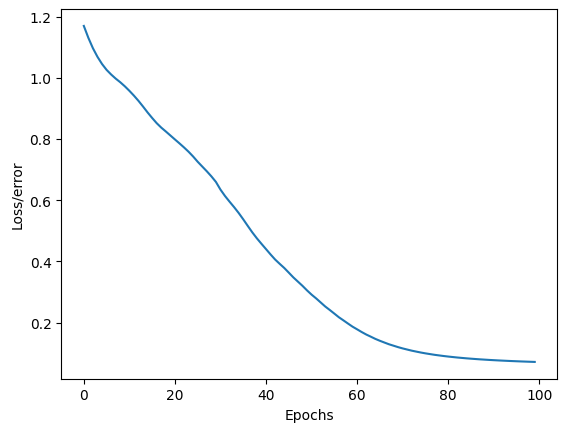

In [17]:
# Graph it out!
plt.plot(range(epochs), losses)
plt.ylabel("Loss/error")
plt.xlabel("Epochs")

print(f"Epochs: {epochs}, Learning Rate: {optimizer.param_groups[0]['lr']}")

In [18]:
# Evaluate Model on Test Data Set (validate model on test set)
with torch.no_grad(): #Basically turn off backpropagation
  y_eval = model.forward(X_test) # X_test are features from our test set, y_eval are our predictions
  loss = criterion(y_eval, y_test) #Find loss or error, same deal




In [19]:
print(f"Loss on test set: {loss}")

Loss on test set: 0.05391683429479599


In [20]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    if y_test[i] == 0:
      x = "Setosa"
    elif y_test[i] == 1:
      x = "Versicolor"
    else:
      x = "Virginica"

    # Will tess us what type of flower class our network thinks it is
    print(f"{i+1}.) {str(y_val)} \t {x} \t {y_test[i]}")

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1

  print(f'We got {correct} correct out of {len(y_test)}')
  print(f'Accuracy: {100*correct/len(y_test)}%')

1.) tensor([-3.3580,  3.9452,  0.3616]) 	 Versicolor 	 1
2.) tensor([  7.5862,   1.1113, -11.3861]) 	 Setosa 	 0
3.) tensor([  6.6288,   1.5092, -10.4603]) 	 Setosa 	 0
4.) tensor([-3.3304,  4.2647,  0.0569]) 	 Versicolor 	 1
5.) tensor([-7.3705,  2.8135,  5.1481]) 	 Virginica 	 2
6.) tensor([-7.3749,  3.9061,  4.2781]) 	 Virginica 	 2
7.) tensor([  6.2304,   1.6527, -10.0543]) 	 Setosa 	 0
8.) tensor([  6.8783,   1.4056, -10.7016]) 	 Setosa 	 0
9.) tensor([-2.6728,  4.3138, -0.6444]) 	 Versicolor 	 1
10.) tensor([  7.2201,   1.3890, -11.1494]) 	 Setosa 	 0
11.) tensor([-3.8269,  4.4110,  0.5165]) 	 Versicolor 	 1
12.) tensor([-8.6886,  1.9990,  6.9012]) 	 Virginica 	 2
13.) tensor([-2.0605,  3.8275, -0.7672]) 	 Versicolor 	 1
14.) tensor([-1.0676,  4.3809, -2.2975]) 	 Versicolor 	 1
15.) tensor([-7.5000,  2.6230,  5.3318]) 	 Virginica 	 2
16.) tensor([-8.6214,  1.5491,  7.1280]) 	 Virginica 	 2
17.) tensor([-3.7724,  3.6503,  0.9422]) 	 Versicolor 	 1
18.) tensor([-6.7624,  2.7791,  4

In [21]:
# Create new iris data point
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [23]:
with torch.no_grad():
  print(model(new_iris))

tensor([  6.9155,   1.2532, -10.6096])


In [25]:
newer_iris = torch.tensor([5.1,	3.5,	1.4,	0.2])


In [26]:
with torch.no_grad():
  print(model(newer_iris))

tensor([  7.4628,   1.3147, -11.4089])


In [27]:
# Save our NN Model
torch.save(model.state_dict(), 'my_really_awesome_iris_model.pt') # We save trained weights and biases

In [28]:
# Load saved model
new_model = Model()
new_model.load_state_dict(torch.load('my_really_awesome_iris_model.pt'))


<All keys matched successfully>

In [29]:
# Make sure it loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [32]:
# Test our loaded model
even_newer_iris = torch.tensor([5.9,	3.0,	5.1,	1.8])
with torch.no_grad():
  y_pred = new_model(even_newer_iris)
  print(y_pred) # The right target is 2.0 (Virginica)

tensor([-6.7319,  2.6637,  4.5465])
